In [9]:
### Student Name: Syed Hammad Ali   
### Student ID:  sa04324
### Student Email:  sa04324@st.habib.edu.pk

## Case Study 1: Google Play Store apps and reviews
<p>Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.</p>
<p><img style="width:50%" src="https://assets.datacamp.com/production/project_619/img/google_play_store.png" alt="Google Play logo"></p>
<p>Let's take a look at the data, which consists of two files:</p>
<ul>
<li><code>apps.csv</code>: contains all the details of the applications on Google Play. There are 13 features that describe a given app.</li>
<li><code>user_reviews.csv</code>: contains 100 reviews for each app, <a href="https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/">most helpful first</a>. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.</li>
</ul>

## 1. Import Data

In [10]:
# Read in dataset
import pandas as pd
apps_with_duplicates = pd.read_csv('apps.csv')


# Drop duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ', len(apps))

# Print random sample of 5 entries
apps.sample(5)

Total number of apps in the dataset =  9659


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3864,4795,Boomerang Make and Race,FAMILY,4.4,281448,70M,"10,000,000+",Free,0,Everyone,Racing;Action & Adventure,"June 1, 2018",1.5.0,4.0 and up
9328,10503,Offroad 4x4 Car Driving,FAMILY,4.3,26224,43M,"1,000,000+",Free,0,Everyone,Simulation,"April 29, 2017",1.0.4,2.3 and up
1213,1490,iProperty Malaysia,HOUSE_AND_HOME,4.2,809,7.8M,"100,000+",Free,0,Everyone,House & Home,"July 25, 2018",1.6.1.2,4.0 and up
4267,5220,Jarvis artificial intelligent,FAMILY,3.9,253,14M,"10,000+",Free,0,Everyone,Entertainment,"March 28, 2018",1.1,2.3 and up
190,190,ADP Mobile Solutions,BUSINESS,4.3,85185,29M,"5,000,000+",Free,0,Everyone,Business,"July 17, 2018",3.4.2,5.0 and up


## 2. Data cleaning
<p>The three features that we will be working with most frequently henceforth are <code>Installs</code>, <code>Size</code>, and <code>Price</code>. A careful glance of the dataset reveals that some of these columns mandate data cleaning in order to be consumed by code we'll write later. Specifically, the presence of special characters (<code>, $ +</code>) and letters (<code>M k</code>) in the <code>Installs</code>, <code>Size</code>, and <code>Price</code> columns. Also it make their conversion to a numerical data type difficult. Let's clean by removing these and converting each column to a numeric type.</p>

In [11]:
chars_to_remove = ['+',',','M','$']
cols_to_clean = ['Installs','Size','Price']

# Loop for each column and characters
for i in cols_to_clean:
  for char in chars_to_remove:
    apps[i] = apps[i].str.replace(char,'')
# Convert cols to numeric
  apps[i] = pd.to_numeric(apps[i])
  

In [12]:
# Write your analysis after every question. Select Markdown from top menu instead of Code and then execute the cell

We are removing unnecessary characters from specific columns and converting the column types to numerical so we can easily apply arithmetic (if required) and do better analysis.

## 3. Exploring app categories
<p>With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play. To improve the overall search experience, Google has introduced the concept of grouping apps into categories.</p>
<p>This brings us to the following questions:</p>
<ul>
<li>Which category has the highest share of (active) apps in the market? </li>
<li>Is any specific category dominating the market?</li>
<li>Which categories have the fewest number of apps?</li>
</ul>

Number of categories =  33


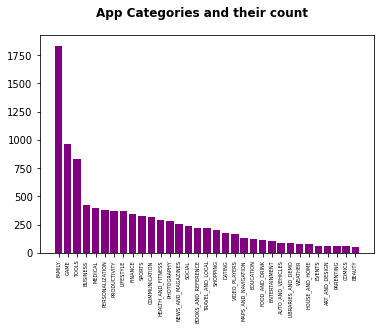

In [13]:
#import your favourite library for visualization
import matplotlib.pyplot as plt
import numpy as np


# Print the total number of unique categories
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category' and sort them for easier plotting
num_apps_in_category = apps['Category'].value_counts().sort_values(ascending=False)

# Plot any graph (bar,chart,line etc.) to show each category and its count for visualization
plt.bar(num_apps_in_category.index, num_apps_in_category.values, color='purple')
plt.xticks(num_apps_in_category.index, fontsize=5, rotation=90)
plt.suptitle('App Categories and their count',fontsize=12, fontweight='bold')
plt.show()

In [14]:
# Write your analysis after every question. Select Markdown from top menu instead of Code and then execute the cell



*   Family category has the highest number of active apps in the market.
*   Family category is definitely dominating the market since it's competitor games is almost at     half the apps in that category.
*   Beauty, Comics and Events are to name a few of the categories with fewest apps.

I would also like to give credit to Abdullah Iqbal to help me with plotting this histogram using matplotlib.




## 4. Distribution of app ratings
<p>After having witnessed the market share for each category of apps, let's see how all these apps perform on an average. App ratings (on a scale of 1 to 5) impact the discoverability, conversion of apps as well as the company's overall brand image. Ratings are a key performance indicator of an app.</p>
<p>Add Histogram plot to visualize the distribution of app ratings</p>

Average app rating =  4.173243045387994


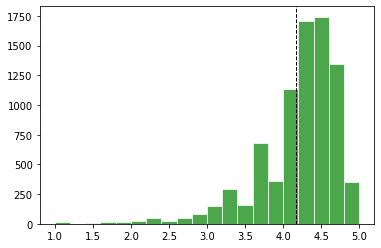

In [15]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Vertical dashed line to indicate the average app rating
import numpy as np
import matplotlib.pyplot as plt

result = plt.hist(apps['Rating'], bins=20, color='g', edgecolor='w', alpha=0.7)
plt.axvline(avg_app_rating, color='k', linestyle='dashed', linewidth=1)

In [16]:
# Write your analysis after every question. Select Markdown from top menu instead of Code and then execute the cell

The graph does not follow a random normal distribution and the mean is already quite high, so for an app to be average it lies in the 4-4.5 rating loosely. However to classify an app as something great or exceptional, it should be over the 4.5 mark for average rating. Similarly, any app below a 4 rating can be considered a 'bad' or useless/obsolete app.

## 5. Size and price of an app
<p>Let's now examine app size and app price. For size, if the mobile app is too large, it may be difficult and/or expensive for users to download. Lengthy download times could turn users off before they even experience your mobile app. Plus, each user's device has a finite amount of disk space. For price, some users expect their apps to be free or inexpensive. These problems compound if the developing world is part of your target market; especially due to internet speeds, earning power and exchange rates.</p>
<p>How can we effectively come up with strategies to size and price our app?</p>
<ul>
<li>Does the size of an app affect its rating? </li>
<li>Do users really care about system-heavy apps or do they prefer light-weighted apps? </li>
<li>Does the price of an app affect its rating? </li>
<li>Do users always prefer free/cheaper apps over paid apps? What price range do majoriy of apps fall into?</li>
</ul>

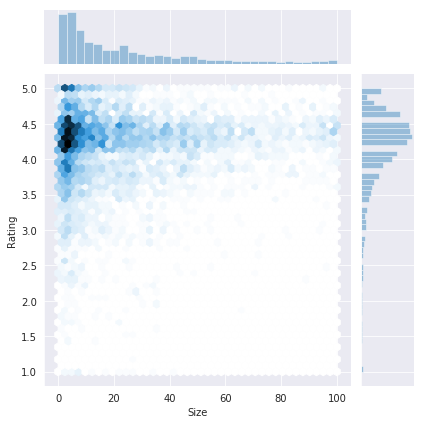

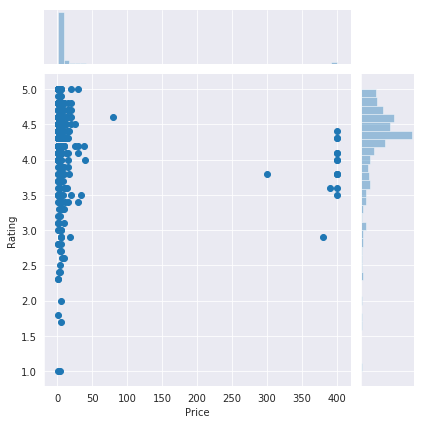

In [11]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")
# Get the subset for categories with at least 250 apps
large_categories = apps.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()

# Plot size vs. rating
sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'], data = large_categories, kind = 'hex')

# Subset for paid apps only
paid_apps = apps[apps['Price'] > 0]

# Plot price vs. rating
sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'], data = paid_apps)


In [0]:
# Write your analysis after every question. Select Markdown from top menu instead of Code and then execute the cell

Analysing the first plot, apps with smaller size have all kinds of ratings but most of them are concentrated around the mean and are pretty high. However, in case of larger sized apps, they are fewer in number but still as the size increases, the average rating among larger apps also increases. From 0-60MB there is a faint slope of increasing rating, and after 60 almost all larger games have around average or above average rating, indicating larger apps are more likely to be liked by users. However, due to higher density towards free/cheap apps, we can understand users are more likely to download and like the app if it's free rather than going for paid apps.

Considering the second plot, free and cheap games have all kinds of ratings but more densely near the mean and above the mean ratings, indicating that higher portion of the free/cheap apps are liked by users. To our surprise, there is a scarcity of apps in the 50-350 range so there are no solid conclusions to be drawn there. Apps which cost more than 350 are likely to be found around the mean rating or slightly below it, showing us that people who pay larger amounts of money for an app expect it to be up to standards, and if not then they get dissapointed for not getting return over investment and are likely to leave bad ratings. 

## 6. Relation between app category and app price
<p>So now comes the hard part. How are companies and developers supposed to make ends meet? What monetization strategies can companies use to maximize profit? The costs of apps are largely based on features, complexity, and platform.</p>
<p>There are many factors to consider when selecting the right pricing strategy for your mobile app. It is important to consider the willingness of your customer to pay for your app. A wrong price could break the deal before the download even happens. Potential customers could be turned off by what they perceive to be a shocking cost, or they might delete an app they’ve downloaded after receiving too many ads or simply not getting their money's worth.</p>
<p>Different categories demand different price ranges. Some apps that are simple and used daily, like the calculator app, should probably be kept free. However, it would make sense to charge for a highly-specialized medical app that diagnoses diabetic patients.
<ul>
<li>What is the maximum price for GAME category. What is the average price of paid GAME category? </li>
<ul>

Maximum Price for GAME category:

Unnamed: 0                           4203
App               The World Ends With You
Category                             GAME
Rating                                4.6
Reviews                              4108
Size                                   13
Installs                            10000
Type                                 Paid
Price                               17.99
Content Rating               Everyone 10+
Genres                             Arcade
Last Updated            December 14, 2015
Current Ver                         1.0.4
Android Ver                    4.0 and up
Name: 3332, dtype: object

Average Price for paid GAME category:
3.467195121951223


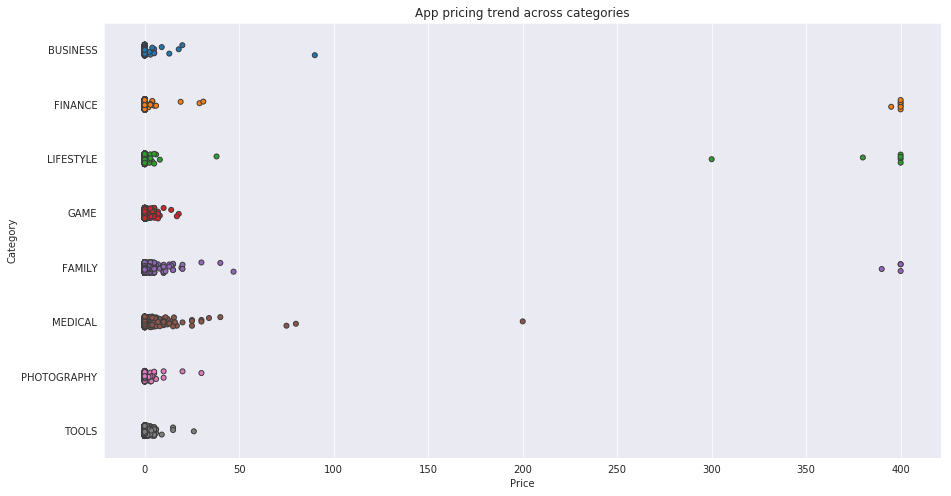

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine and plot the price trend for the above categories
ax = sns.stripplot(x='Price', y='Category', data=popular_app_cats,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Examine GAME Category. What is the maximum price for GAME category. What is the average price of paid GAME category?
Game_Cat = apps[apps.Category.isin(['GAME'])]
Max_Game_Price = Game_Cat.loc[Game_Cat['Price'].idxmax()]
Avg_Game_Price = Game_Cat.loc[:,'Price'][Game_Cat['Type']=='Paid'].mean()
print('Maximum Price for GAME category:\n')
print(Max_Game_Price)
print('\nAverage Price for paid GAME category:')
print(Avg_Game_Price)

Most apps are tightly bound under 50 from every category except a few. If we talk about the max price of a game being 17.99, it is also reasonable considering the fact that most console and PC games have a retail price close to this. However, Finance, lifestyle and family categories have some apps near the 400 mark which may be considered too expensive.

## 7. Filter out "junk" apps
<p>It looks like a bunch of the really expensive apps are "junk" apps. That is, apps that don't really have a purpose. Some app developer may create an app called <em>I Am Rich Premium</em> or <em>most expensive app (H)</em> just for a joke or to test their app development skills. Some developers even do this with malicious intent and try to make money by hoping people accidentally click purchase on their app in the store.</p>
<p>Let's filter out these junk apps and re-do our visualization.

Text(0.5, 1.0, 'App pricing trend across categories with Authentic Apps')

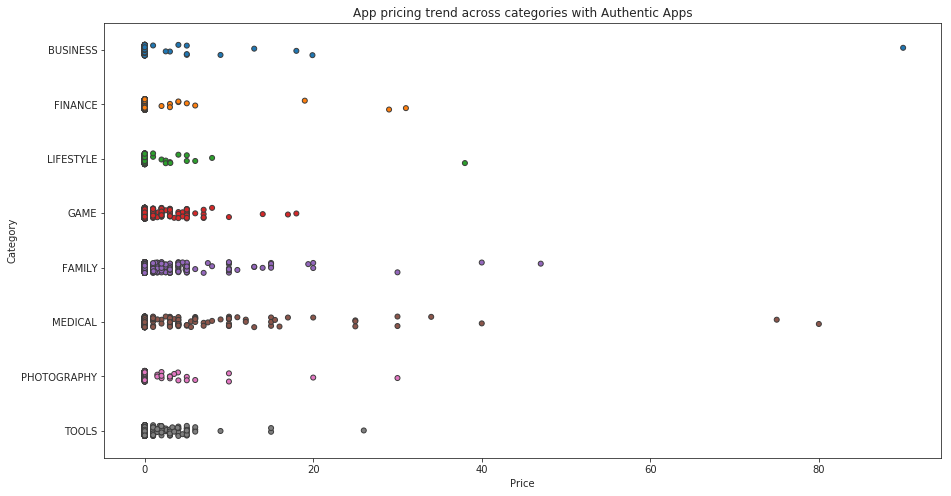

In [21]:
# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Category, Name and Price of apps priced above $100 which will be considered as Junk apps.
Junk_apps = popular_app_cats[['Category','App','Price']][popular_app_cats['Price']>100]

# Select apps priced below $100 which will be considered as authentic apps.
Authentic_apps = popular_app_cats[['Category','App','Price']][popular_app_cats['Price']<100]

# Examine and visualize price vs category with the authentic apps. You can use strip  plot or box plot
ax = sns.stripplot(x="Price", y="Category" ,data=Authentic_apps,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories with Authentic Apps')


In [0]:
# Write your analysis after every question. Select Markdown from top menu instead of Code and then execute the cell

A clearer picture can be seen now. We can see the most expensive app belongs to the business category, on the other hand medical has the highest divation ranging from free apps to upto 80. All other apps are as I discussed earlier, tighly bound under 50 which was a good estimate. 

## 8. Popularity of paid apps vs free apps
<p>For apps in the Play Store today, there are five types of pricing strategies: free, freemium, paid, paymium, and subscription. Let's focus on free and paid apps only. Some characteristics of free apps are:</p>
<ul>
<li>Free to download.</li>
<li>Main source of income often comes from advertisements.</li>
<li>Often created by companies that have other products and the app serves as an extension of those products.</li>
<li>Can serve as a tool for customer retention, communication, and customer service.</li>
</ul>
<p>Some characteristics of paid apps are:</p>
<ul>
<li>Users are asked to pay once for the app to download and use it.</li>
<li>The user can't really get a feel for the app before buying it.</li>
</ul>
<p>Are paid apps are installed as much as free apps?

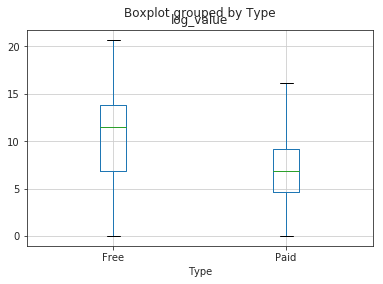

In [20]:
# Visualize Number of downloads of paid apps vs. free apps. Hint (convert number of downloads to log in order to scale down actual value)
# Box plot is preferred.
Paid_Installed_Apps = apps['Installs'][apps['Type']=='Paid'].tolist() 
Free_Installed_Apps = apps['Installs'][apps['Type']=='Free'].tolist()

df = pd.DataFrame(({'Paid':pd.Series(Paid_Installed_Apps),
                   'Free':pd.Series(Free_Installed_Apps)}), columns = ['Paid','Free'])

apps['log_value']=np.log(apps['Installs'])
apps.boxplot(by='Type',column=["log_value"])

In [0]:
# Write your analysis after every question. Select Markdown from top menu instead of Code and then execute the cell

Free apps are installed more than paid apps. Median of free apps is higher than that of paid apps.

## 9. Sentiment analysis of user reviews
<p>Mining user review data to determine how people feel about your product, brand, or service can be done using a technique called sentiment analysis. User reviews for apps can be analyzed to identify if the mood is positive, negative or neutral about that app. For example, positive words in an app review might include words such as 'amazing', 'friendly', 'good', 'great', and 'love'. Negative words might be words like 'malware', 'hate', 'problem', 'refund', and 'incompetent'.</p>
<p>Sentiment polarity defines sentiment with a range from +1 to -1 (+1 being positive, -1 being negative and 0 being neutral)</p>
<p>What is the sentiment trend of user reviews for paid and free apps?</p>


Text(0.5, 1.0, 'Sentiment Polarity Distribution')

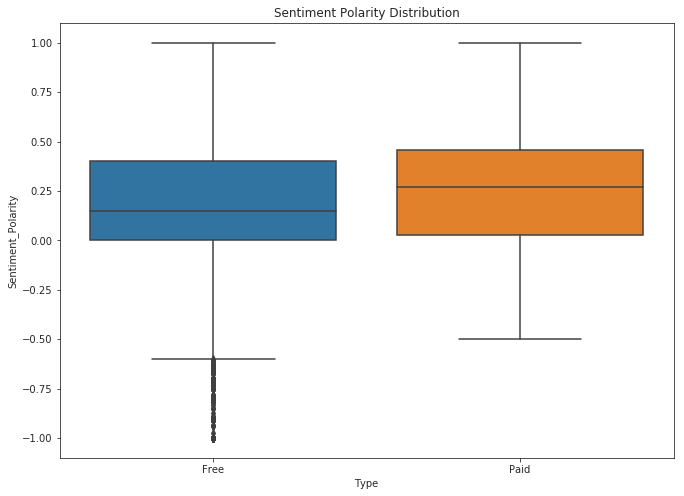

In [18]:
# Load user_reviews.csv
reviews_df = pd.read_csv('user_reviews.csv')

# Join and merge the two dataframe
merged_df = pd.merge(apps,reviews_df, on = 'App', how = "inner")

# Drop NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')
# Load user_reviews.csv

# Join and merge the two dataframe apps and user_reviews. Drop NA values from Sentiment and Translated_Review columns

# Visualize user review sentiment polarity for paid vs. free apps. Hint (use Box plot for better visualization and analysis)

In [0]:
# Write your analysis after every question. Select Markdown from top menu instead of Code and then execute the cell

Paid apps have a more positive trend in sentiments as compared to free apps.